<a href="https://colab.research.google.com/github/ruforavishnu/Project_Machine_Learning/blob/master/Project_12_Unsupervised_Learning_Anomaly_Detection_in_Network_Traffic_using_DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install numpy pandas  matplotlib seaborn scikit-learn


First lets try this **with simulated Data**. Once we do that we shall start with real world data

In [2]:
from sklearn.datasets import make_classification
import pandas as pd

X, _ = make_classification(n_samples=1000, n_features=6, n_informative=3, n_redundant=0, random_state=42)

df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(6)])
df.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5
0,0.596769,-0.089969,0.249451,-0.147340,0.910856,0.963925
1,-1.406897,-0.459235,0.582738,-1.786375,-0.456370,-0.622035
2,-2.763998,0.556088,-0.170386,0.499096,-2.336728,-1.692271
3,0.040390,-1.386679,1.911419,-2.025808,1.629161,-1.070852
4,0.479638,-1.788940,-1.435910,0.424067,2.403671,0.039447


Data Preprocessing

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)



 Apply DBSCAN for Clustering

In [5]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=1.2, min_samples=5)
db.fit(scaled_data)

df['cluster'] = db.labels_

 Visualize Results with PCA (2D View)

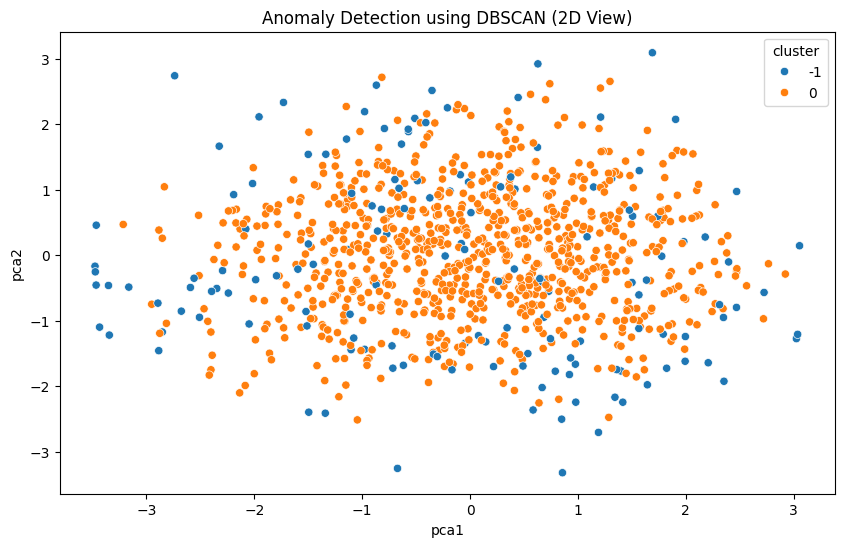

In [6]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

pca = PCA(n_components=2)
pca_data =pca.fit_transform(scaled_data)

df['pca1'] = pca_data[:, 0]
df['pca2'] = pca_data[:, 1]

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='pca1',y='pca2', hue='cluster', palette='tab10')
plt.title('Anomaly Detection using DBSCAN (2D View)')
plt.show()

In [7]:
df['cluster'].value_counts()

,count
cluster,
0,853
-1,147


In [8]:
for eps in [0.5, 1.0, 1.5]:
    model = DBSCAN(eps=eps, min_samples=5)
    model.fit(scaled_data)
    labels = model.labels_
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_anomalies = list(labels).count(-1)
    print(f"eps={eps} → clusters: {n_clusters}, anomalies: {n_anomalies}")


eps=0.5 → clusters: 0, anomalies: 1000
eps=1.0 → clusters: 3, anomalies: 396
eps=1.5 → clusters: 1, anomalies: 38


Visualize Before DBSCAN (Just Raw PCA Data)

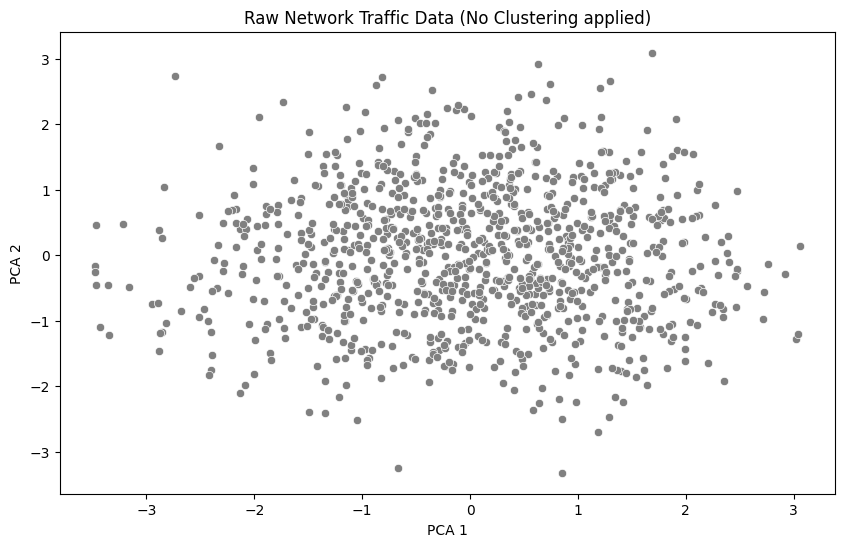

In [9]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['pca1'], y=df['pca2'], color='gray')
plt.title('Raw Network Traffic Data (No Clustering applied)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

Visualize After DBSCAN (Clusters vs Anomalies)

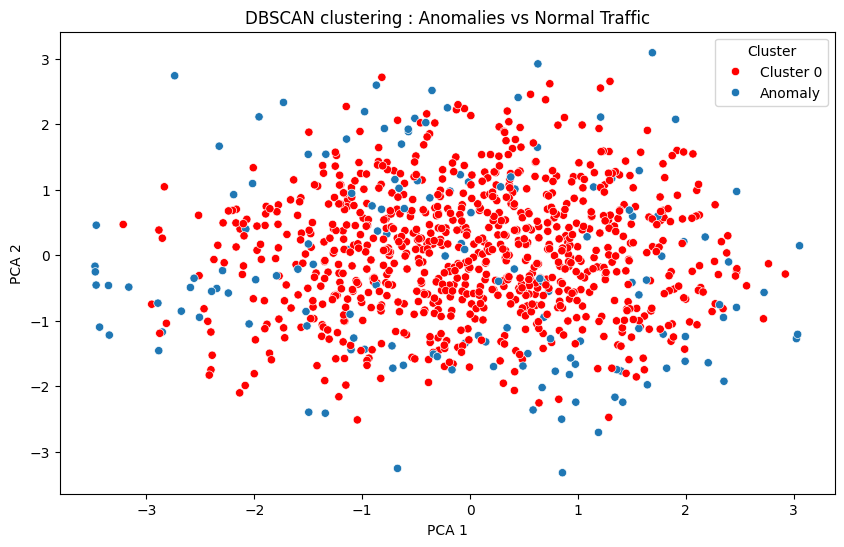

In [11]:
plt.figure(figsize=(10,6))

# use a specific color palette, highlight anomalies as red
palette = sns.color_palette('tab10', len(set(df['cluster'])) - (1 if -1 in df['cluster'].values else 0 ) )
sns.scatterplot(
    data=df,
    x='pca1',
    y='pca2',
    hue=df['cluster'].apply(lambda x: 'Anomaly' if x==-1 else f'Cluster {x}'),
    palette=['red'] + palette,
    legend='full'
)



plt.title('DBSCAN clustering : Anomalies vs Normal Traffic')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.show()

 Pie Chart of Anomaly Count

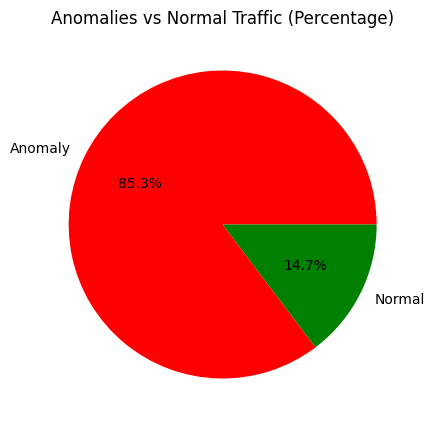

In [12]:
counts = df['cluster'].apply(lambda x: 'Anomaly' if x==-1 else 'Normal').value_counts()


plt.figure(figsize=(5,5))
counts.plot(kind='pie', autopct='%1.1f%%', colors=['red','green'], labels=['Anomaly','Normal'])
plt.title('Anomalies vs Normal Traffic (Percentage)')
plt.ylabel('')
plt.show()

We have successfully found out meanings and patterns from unstructured data. We have found and separated Anomalies Traffic and Normal Traffic


Ok, now lets do this with **real life data - KDD Cup 99 dataset**

In [17]:
from sklearn.datasets import fetch_kddcup99
import pandas as pd

# Load the 10% subset
data = fetch_kddcup99(subset='SA', percent10=True, shuffle=True)
df = pd.DataFrame(data.data)
df.columns = data.feature_names
df['target'] = pd.Series(data.target).astype(str)

In [18]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,b'tcp',b'http',b'SF',214,1538,0,0,0,0,...,255,1.0,0.0,0.12,0.06,0.0,0.01,0.0,0.0,normal.
1,0,b'tcp',b'http',b'SF',251,1875,0,0,0,0,...,252,0.99,0.01,0.0,0.0,0.0,0.0,0.0,0.0,normal.
2,19,b'tcp',b'smtp',b'SF',11820,1360,0,0,0,0,...,121,0.47,0.02,0.0,0.0,0.0,0.0,0.03,0.02,normal.
3,0,b'tcp',b'ftp_data',b'SF',192,0,0,0,0,0,...,83,0.33,0.02,0.33,0.0,0.0,0.0,0.0,0.0,normal.
4,0,b'tcp',b'http',b'SF',230,3920,0,0,0,0,...,255,1.0,0.0,0.02,0.01,0.0,0.0,0.0,0.0,normal.


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100655 entries, 0 to 100654
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   duration                     100655 non-null  object
 1   protocol_type                100655 non-null  object
 2   service                      100655 non-null  object
 3   flag                         100655 non-null  object
 4   src_bytes                    100655 non-null  object
 5   dst_bytes                    100655 non-null  object
 6   land                         100655 non-null  object
 7   wrong_fragment               100655 non-null  object
 8   urgent                       100655 non-null  object
 9   hot                          100655 non-null  object
 10  num_failed_logins            100655 non-null  object
 11  logged_in                    100655 non-null  object
 12  num_compromised              100655 non-null  object
 13  root_shell    

In [20]:
df = df.apply(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)

categorical_cols = ['protocol_type', 'service', 'flag','target']
df_numeric = df.drop(columns=categorical_cols)

df_numeric = df_numeric.apply(pd.to_numeric, errors='coerce')

print(df_numeric.isna().sum().sum())

0


In [21]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100655 entries, 0 to 100654
Data columns (total 38 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     100655 non-null  int64  
 1   src_bytes                    100655 non-null  int64  
 2   dst_bytes                    100655 non-null  int64  
 3   land                         100655 non-null  int64  
 4   wrong_fragment               100655 non-null  int64  
 5   urgent                       100655 non-null  int64  
 6   hot                          100655 non-null  int64  
 7   num_failed_logins            100655 non-null  int64  
 8   logged_in                    100655 non-null  int64  
 9   num_compromised              100655 non-null  int64  
 10  root_shell                   100655 non-null  int64  
 11  su_attempted                 100655 non-null  int64  
 12  num_root                     100655 non-null  int64  
 13 

In [22]:
df_numeric.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,214,1538,0,0,0,0,0,1,0,...,8,255,1.00,0.00,0.12,0.06,0.0,0.01,0.00,0.00
1,0,251,1875,0,0,0,0,0,1,0,...,255,252,0.99,0.01,0.00,0.00,0.0,0.00,0.00,0.00
2,19,11820,1360,0,0,0,0,0,1,0,...,255,121,0.47,0.02,0.00,0.00,0.0,0.00,0.03,0.02
3,0,192,0,0,0,0,0,0,1,0,...,255,83,0.33,0.02,0.33,0.00,0.0,0.00,0.00,0.00
4,0,230,3920,0,0,0,0,0,1,0,...,44,255,1.00,0.00,0.02,0.01,0.0,0.00,0.00,0.00


Preprocess the Data

In [23]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numeric)



 Apply DBSCAN

In [24]:
df_sample = df_numeric.sample(n=5000, random_state=42)

scaled_sample = scaler.fit_transform(df_sample)

from sklearn.cluster import DBSCAN


db = DBSCAN(eps=2.0, min_samples=5)
db.fit(scaled_sample)

df_sample['cluster'] = db.labels_

In [25]:
df_sample.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,cluster
58908,0,244,3158,0,0,0,0,0,1,0,...,255,1.0,0.0,0.01,0.01,0.0,0.0,0.0,0.0,0
14529,0,253,7652,0,0,0,0,0,1,0,...,255,1.0,0.0,0.02,0.03,0.0,0.0,0.0,0.0,0
13705,0,232,7002,0,0,0,0,0,1,0,...,255,1.0,0.0,0.03,0.03,0.0,0.0,0.0,0.0,0
88256,0,208,478,0,0,0,0,0,1,0,...,255,1.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0
88958,0,234,773,0,0,0,0,0,1,0,...,255,1.0,0.0,0.01,0.02,0.0,0.0,0.0,0.0,0


 Dimensionality Reduction with PCA

In [26]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_sample)
df_sample['pca1'] = pca_data[:, 0]
df_sample['pca2'] = pca_data[:, 1]


In [27]:
df_sample.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,cluster,pca1,pca2
58908,0,244,3158,0,0,0,0,0,1,0,...,0.0,0.01,0.01,0.0,0.0,0.0,0.0,0,-0.435265,-0.974655
14529,0,253,7652,0,0,0,0,0,1,0,...,0.0,0.02,0.03,0.0,0.0,0.0,0.0,0,-0.676807,-0.696821
13705,0,232,7002,0,0,0,0,0,1,0,...,0.0,0.03,0.03,0.0,0.0,0.0,0.0,0,-0.687226,-0.667142
88256,0,208,478,0,0,0,0,0,1,0,...,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0,-0.285022,-1.124865
88958,0,234,773,0,0,0,0,0,1,0,...,0.0,0.01,0.02,0.0,0.0,0.0,0.0,0,-0.556848,-0.825165


BEFORE DBSCAN (raw visualization)

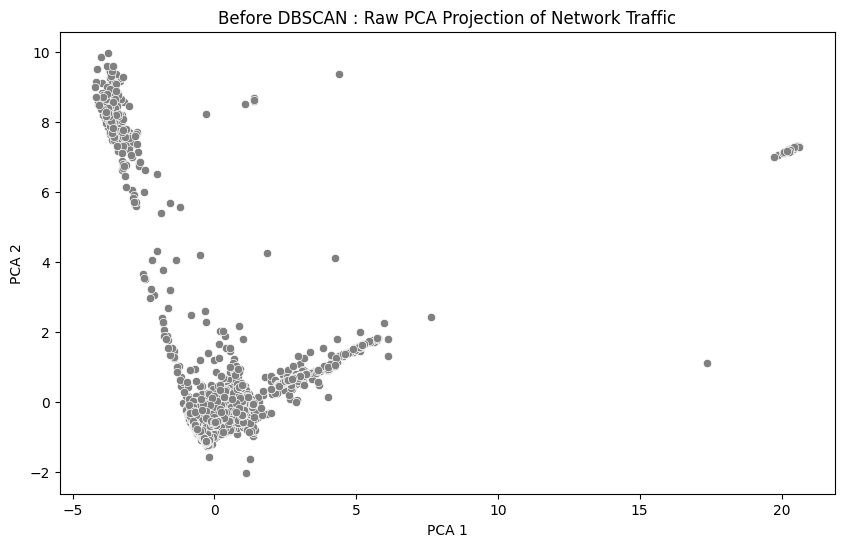

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.scatterplot(x=df_sample['pca1'], y=df_sample['pca2'], color='gray')
plt.title('Before DBSCAN : Raw PCA Projection of Network Traffic')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()




AFTER DBSCAN (Anomalies vs Clusters)

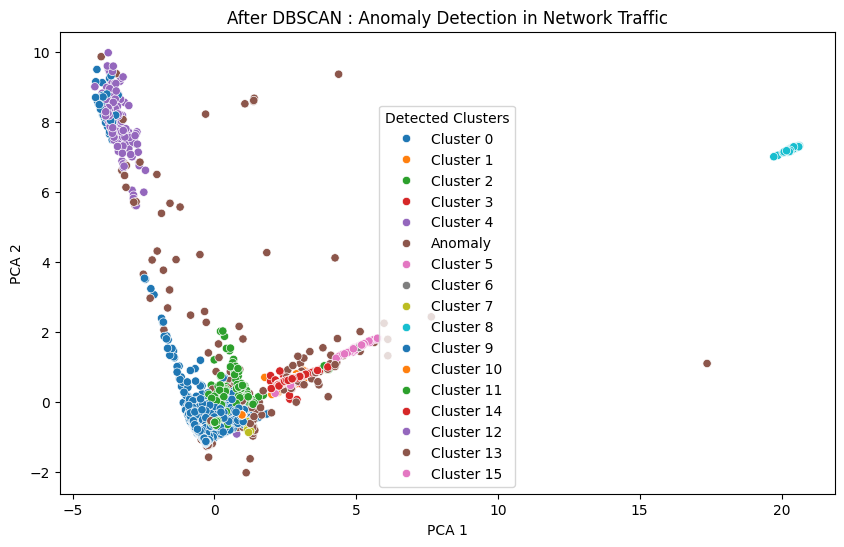

In [30]:
plt.figure(figsize=(10,6))

sns.scatterplot(
    data=df_sample,
    x='pca1',
    y='pca2',
    hue=df_sample['cluster'].apply(lambda x: 'Anomaly' if x==-1 else f'Cluster {x}'),
    palette='tab10',
    legend='full'
)

plt.title('After DBSCAN : Anomaly Detection in Network Traffic')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Detected Clusters')
plt.show()

Pie Chart (Anomaly vs Normal Breakdown)

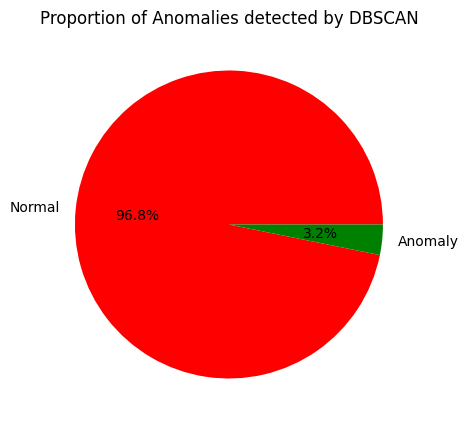

In [32]:
df_sample['anomaly_flag'] = df_sample['cluster'].apply(lambda x: 'Anomaly' if x == -1 else 'Normal')
counts = df_sample['anomaly_flag'].value_counts()


#Now draw pie chart
plt.figure(figsize=(5,5))
counts.plot(kind='pie', autopct='%1.1f%%', colors=['red','green'])
plt.title('Proportion of Anomalies detected by DBSCAN')
plt.ylabel('')
plt.show()

We have successfully found out patterns from the huge database/dataset.

From a huge dataset of unlabeled and unstructured data we have successfully found out hidden patterns and meaning. Successful !